In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [3]:
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-ly9iy4m0
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-ly9iy4m0
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev3+g6bea7157-py3-none-any.whl size=1244326 sha256=9cc96a0e7d292abf21d18f1dbdf7ed6dc53f70198bb9b996d3dcbe2bb304dd24
  Stored in directory: /tmp/pip-ephem-wheel-cache-epidq82r/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.1 MB/s eta 0:00:00


In [1]:
import bambi as bmb

In [ ]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, the whole point of it is too compare 2 models. There is no given range for LOO values so you cant really evaluate just one value. When you have two or more different ones you can analyze better because the value that you are really analying is the difference in the results.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model follows the data so much that it can't do a good job of acually prediction unknown values and instead tries to perfectly follow the patern already given.

**Task3**:

How do we mitigate overfitting?

By using priors and making simpler models that are easier to interpret (less predictors, less interactions, etc.). It is important to know that wheen simplifying you model don't just randomly cut out predictors. Make an informed choice and cut the most irrelevant/most weakly correlated ones.

**Task4**:

How do we mitigate underfitting?

By balancing it out with overfitting (adding more predictors, making weaker priors, adding more interactions)

**Task5**:

Why would we want more than one predictor in a model?

to better help the model decide how to predict by using past data. By showing it which 'factors' of the data are more relevant to it's predictions we can help it make better predictions.

**Task6**:

Can we have too many predictors? How would we now?

YES you can have too many predictors. You can tell that there are too many predictors when the model starts to overfit.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of choosing predictors for your model to use when generating it's predictions. You should choose predictors based on which variables you think have the strongest correlation to your predicted variable.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

When using that categorical variable as a hierarchy upon the other predictor variable the slopes of each catagorical variable/the outputs will be different. When telling your model which variables are related, it also changes the output, making it similar to the heirarchical model.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Linear regression models can be visualized by graphing. these can be scatterplots with recressions lines or ppc's.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [8]:
model_1_bmb = bmb.Model("FGp ~ Pos + FTp", bb, family = "negativebinomial")
idata_1_bmb = model_1_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 120 divergences after tuning. Increase `target_accept` or reparameterize.


In [9]:
model_2_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_2_h = model_2_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 12 divergences after tuning. Increase `target_accept` or reparameterize.


In [10]:
model_3_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
idata_3_inter = model_3_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [11]:
model_4_inter = bmb.Model("`FGp` ~ `FTp` + Pos + '3PA' + `FTp`: '3PA' + 'FTp': Pos + '3PA' : Pos", data=bb)
idata_4_inter = model_4_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [12]:
model_5_inter = bmb.Model("`FGp` ~ `FTp` + Pos + '3PA' : Pos", data=bb)
idata_5_inter = model_4_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

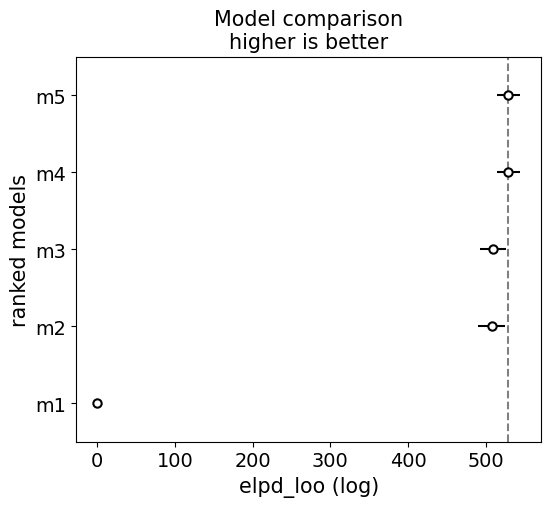

In [16]:
cmp_tsk10 = az.compare( {"m1":idata_1_bmb,"m2":idata_2_h, "m3":idata_3_inter, "m4":idata_4_inter, "m5":idata_5_inter} )
cmp_tsk10
az.plot_compare(cmp_tsk10)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to the comparision made with eldp_loo, the fifth model that used free throw percentage, position, and 3 point attempts as predictors and specified an interaction between positioon and 3 point attempts.

I think that this result makes sense for a couple reasons-

- It has a 'good' amount of predictors
  -  Three predictors is good because it allows the model to make conections to help it predict future values, but it doesn't have TOO many predictors which might risk the model overfitting
- The interactions are logical
  - The fourth and fifth models have the same predictors but different interactions. Intuitivley, you would think that more interactions (model 4) would be better because it helps the model realize how everything is connected and make better guesses, but that is actully not true. It is better to make connections between a few strongly correlated predictors than many weakly correlated predictors. This is because too many interactions can once again (similar to the number of predictors) cause overfitting and confusion within the model.
    - HOWEVER, even though model 5 is better than model 4, it is important to note that they are very very similar showing that having an extra interaction or two isn't the end of the world